<a href="https://colab.research.google.com/github/BilawalBaloch/Tensorflow.NN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [79]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


In [80]:
x_train.shape

(50000, 32, 32, 3)

In [81]:
x_test.shape

(10000, 32, 32, 3)

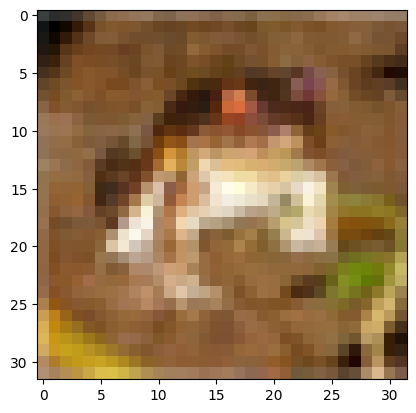

In [82]:
plt.imshow(x_train[0])

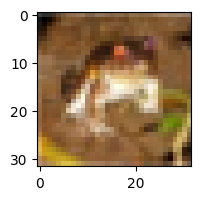

In [83]:
plt.figure(figsize=(5,2))
plt.imshow(x_train[0])

**Normalize pixel values to be between 0 and 1
    This is a crucial step for neural network training**

In [84]:
x_train , x_test  = x_train/255.0, x_test/255.0

**The labels (y) are currently single integers (e.g., 0, 1, 2).
    We need to convert them to categorical one-hot encoded vectors.
    For example, the label '3' would become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]**

In [85]:
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [86]:
y_test = tf.keras.utils.to_categorical(y_test, 10)

**Defining the Classes**

In [87]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


**Print data shapes to verify the process**

In [88]:
print(f"x_train shape :{x_train.shape}")
print(f"y_train shape :{y_train.shape}")
print(f"x_test shape:{x_test.shape}")
print(f"y_test shape:{y_test.shape}")

x_train shape :(50000, 32, 32, 3)
y_train shape :(50000, 10)
x_test shape:(10000, 32, 32, 3)
y_test shape:(10000, 10)


# **Model Selection**

In [89]:
model_cnn = keras.Sequential

**putting the layers**

In [90]:
model_cnn = keras.Sequential([
    layers.Conv2D(32, kernel_size =(3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters =64, kernel_size = (3,3), activation= 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(10, activation = 'softmax')

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the model**

In [91]:
model_cnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Shape**

In [92]:

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


#**Fitting the Model**

In [96]:
model_cnn.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 163ms/step - accuracy: 0.5659 - loss: 1.2366 - val_accuracy: 0.5866 - val_loss: 1.1911
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 163ms/step - accuracy: 0.5944 - loss: 1.1408 - val_accuracy: 0.6050 - val_loss: 1.1236
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 165ms/step - accuracy: 0.6299 - loss: 1.0505 - val_accuracy: 0.6124 - val_loss: 1.0998
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 169ms/step - accuracy: 0.6626 - loss: 0.9801 - val_accuracy: 0.6371 - val_loss: 1.0396
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 162ms/step - accuracy: 0.6745 - loss: 0.9297 - val_accuracy: 0.6537 - val_loss: 1.0013


In [95]:
loss, mae = model_cnn.evaluate(x_test, y_test)
print(f'Mean Absolute Error (MAE) on test data: {mae}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5330 - loss: 1.3281
Mean Absolute Error (MAE) on test data: 0.5299999713897705
